<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#El-método-k-means" data-toc-modified-id="El-método-k-means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>El método k-means</a></span></li><li><span><a href="#Método-elbow" data-toc-modified-id="Método-elbow-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Método elbow</a></span></li><li><span><a href="#Gráfico-silhouette" data-toc-modified-id="Gráfico-silhouette-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gráfico silhouette</a></span></li><li><span><a href="#Ejemplo-de-k-means--para-dígitos" data-toc-modified-id="Ejemplo-de-k-means--para-dígitos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ejemplo de k-means  para dígitos</a></span></li><li><span><a href="#Cluster-Jerárquico" data-toc-modified-id="Cluster-Jerárquico-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cluster Jerárquico</a></span></li><li><span><a href="#Cluster-con-DBSCAN" data-toc-modified-id="Cluster-con-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cluster con DBSCAN</a></span></li></ul></div>

# Introducción

En este post se va a exponer una nueva modelo de análisis estadístico multivariante que se encuadra dentro de los métodos denominados genéricamente como algoritmos de tipo clúster. Se trata de una serie de **métodos no supervisados** que permiten agrupar los datos con una distancia menor entre ellos, así como maximizar la distancia entre los diversos grupos.


# El método k-means

Uno de los métodos más utilizados para este tipo de análisis estadístico es el popularmente conocido como **método k-means**. Este método es fácil de implementar y al mismo tiempo no es muy expansivo en cuanto a recursos computacionales se refiere, de ahí proviene la popularidad del método. 

El método k-means pertenece a la categoría de los métodos **denominados prototype-based**, los cuales se basan en la idea de que cada clúster está representado por un prototipo, el cual es denominado **centroide** ( punto medio de los puntos) para variables o features de tipo continuo, o **medoid** ( puntos más representativos o frecuentes) en el caso de variables o features de tipo categórico. 

Uno de los mayores inconvenientes de este método es que a priori se debe especificar el valor k relativo al número de clúster's a obtener. Sin embargo existe alguna técnica que ayuda o obtener un valor óptimo de k, enter ellas se pueden destacar el **método de elbow** y el gráfico denominado **silhouette**.

Comenzamos exponiendo este método para un ejemplo sencillo de dos dimensiones, con la finalidad de que el lector pueda apreciar de forma más clara las características de este modelo.

 

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0)
#Procedemos a su representación gráfica
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
    X[:,1],
    c='black',
    marker='x')

plt.show()

<Figure size 640x480 with 1 Axes>

A efectos didácticos, se han obtenido 150 puntos en dos dimensiones, que forman claramente tres grupos de datos, que este algoritmo detectará. Esta situación ideal en el mundo real es difícil que se de, y lo más probable es que exista una mezcla de puntos entre grupos que hagan más difícil identificar los cluster's. 

Los pasos que sigue este algoritmo, de forma resumida, son los siguientes (siendo k el número de clúster's elegidos ):

1.- Se eligen k centroides iniciales intentado sean los más representativos de cada clase.

2.- Cada punto se asigna al centroide \\( \mu_j  \; j\epsilon{1,2,...,k} \\) más cercano.

3.- Recalcular los centroides con los nuevos puntos asignados.

4.- Repetir los pasos 2 y 3 hasta que se cumpla el criterio de tolerancia que se haya definido o bien se sobrepase el número de iteraciones asignadas.

Una de las cuestiones claves de este método en la *medición de la similitud entre objetos*, para ello lo que hay que tener definido es una determinada distancia. En el caso de variables de tipo continuo, una de las distancias más utilizadas es la distancia euclidea que se define de la siguiente manera:

\\[ d(x,y)^2=\sum_{i=1}^m (x_i-y_i)^2=||x-y||_2^2 \\]

Una nota sobre nomenclatura a utilizar en este post. El subíndice i con carácter general se va a utilizar para representar las filas de la muestra y el j para hacer referencia a los clúster con los que se trabaja.

Basado en la distancia euclídea, este algoritmo lo que va a conseguir es minimizar la suma de cuadrados dentro del clúster (SEE) mediante un método de aproximaciones sucesivas. El valor de SEE también es conocido como **clúster inertia**.


\\[ SEE= \sum_{i=1}^m  \sum_j ^k  w^{(i,j)} ||x^{(i)}-\mu^{(j)}||_2^2  \\]

Donde \\( \mu^{(j)} \\) es el punto representativo o centroide del clúster j y \\( w^{(i,j)}\\) es igual a 1 si la muestra es del clúster j y cero en caso contrario.

Una vez expuestas las ideas que subyacen a este método, a continuación se pasa a mostrar un ejemplo clarificador de cómo utilizar este método con scikit-learn.  

In [2]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
y_km = km.fit_predict(X)

En el código anterior los parámetros utilizados más importantes tienen el siguiente significado:

1.- **init='random'**. Es para indicar que elija una serie de centroides de forma aleatoria. Otros posibles valores del parámetro son los siguientes: **k-means++** para seleccionar los centroides para que la convergencia sea más rápida; **ndarray** se indica un ndarray de dimensión (n_clusters, n_features) los centroides que se quieren utilizar en el arranque.

2.- **n_init=10**. Número de veces en los que arranca este procedimiento de forma aleatoria para elegir el que menor inercia posee.

3.- **n_clusters=3**. Para indicar el parámetro k que representa el número de cluster's.

En el ejemplo anterior se ha utilizado el parámetro "init=randon" y como ya se ha indicado lo que se hace es elegir de forma aleatoria los centroides correspondientes para seguir con el método. Este procedimiento en ocasiones nos puede llevar a una ralentización del proceso o incluso a una falta de convergencia, lo que originaría una pérdida de fiabilidad del modelo.

Para evitar este tipo de situaciones, lo que se puede utilizar es el parámetro init con el valor "k-means++", que por regla general obtiene mejores resultados que el sistema usado anteriormente.

Para ver la fiabilidad del método, a continuación se vuelve a generar el gráfico conteniendo los datos iniciales, pero en esta ocasión con indicación del cluster al que pertenece cada punto, indicando para ello un color diferente que identifica la pertenencia a cada uno de los cluster's.

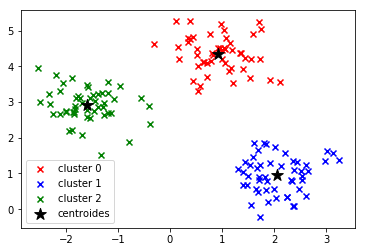

In [3]:
color=['red','blue','green']
for i in range(0,3):
    plt.scatter(X[y_km==i,0],
    X[y_km ==i,1],
    c=color[i],
    marker='x',
    label='cluster '+str(i))
# Coloco los centroides    
plt.scatter(km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    s=150,
    marker='*',
    c='black',
    label='centroides')
plt.legend(loc='lower left')    
plt.show()

# Método elbow

Anteriormente ya se ha comentado que una de las deficiencias importantes de K-means es que hay que definir de forma explícita el valor de k ( número de cluster's). Para evaluar *el mejor k* a utilizar se puede utilizar el método de elbow que a continuación se pasa a exponer.

Como ya se ha dicho anteriormente, k-means lo que pretende es minimizar el valor de SEE definido anteriormente o lo que es lo mismo, minimizar la inercia. Scikip learn tiene una propiedad que permite de una forma cómo calcular ese valor.

In [4]:
print('Distorsion: %.2f' % km.inertia_)

Distorsion: 72.48


Si se va generando el método k-means para distintos valores consecutivos de k y se hace una gráfica de los mismos, se podría cortar en aquel valor de k para el que la gráfica comienza a decrecer más lentamente. Vemos esto para el ejemplo anterior.

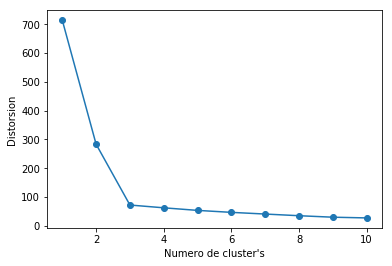

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel("Numero de cluster's")
plt.ylabel('Distorsion')
plt.show()

Como puede verse en el gráfico anterior, para k=3 la gráfica comienza a decrecer mucho más lentamente, y por lo tanto sería k=3 el valor elegido para realizar el análisis clúster en este caso.

# Gráfico silhouette

Otra medida de la calidad del ajuste, nos lo ofrece el indicador denominado silhouette, que además puede ser empleado en otro tipo de algoritmos  de tipo cluster.

Los coeficientes de este indicador se calcularían de la siguiente forma:

1.- Se calcularía el valor de "cluster cohesion" \\( a^{(i)} \\) para cada elementos de los datos tratados, como  el valor medio de las distancias de un punto a todos los puntos del cluster al que pertenece. 

2.- Se calcula el valor "cluster separación" \\( b^{(i)} \\) para cada elemento de los datos tratados, como el valor medio de las distancias de un punto a todos los puntos del cluster más cercano.

3.- Se calcularía el valor de silhouette mediante la siguiente fórmula:

\\[ s^{(i)}=\frac{b^{(i)}-a^{(i)}}{max \\{b^{(i)}, a^{(i)} \\}} \\]

El valor anterior estaría comprendido entre -1 y 1 y lo ideal es que esté lo más cerca posible de 1 y que \\( b^{(i)} >> a^{(i)} \\)

puesto que \\( b^{(i)} \\) cuantifica el grado de disimilitud de un punto a otros cluster's y \\( a^{(i)} \\) mide la similitud de un punto respecto otros elementos del mismo cluster.

El coeficiente silhouette se puede obtener del módulo metric del paquete scikit-learn y además se puede usar silhouette_scores que lo que hace es calcular la media de los coeficientes silhouette, aunque este valor también puede ser calculado con numpy.mean(silhouette_samples(...)) 


Con la ejecución del siguiente código, se puede calcular el gráfico de estos valores y nos servirá para evaluar la calidad de los cluster's obtenidos.

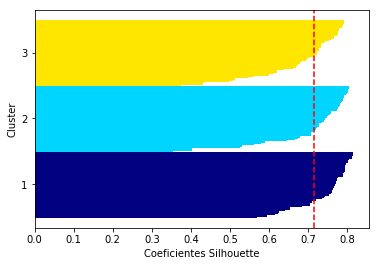

In [6]:
km = KMeans(n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
y_km = km.fit_predict(X)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
    y_km,
    metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
    color="red",
    linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficientes Silhouette')
plt.show()

De acuerdo con el gráfico anterior, observamos que los valores de Silhouette no tienen valores negativos y además muestra valores altos cercanos a 1, lo que indica una buena calidad de los cluster's encontrados.

Además para incidir aún más sobre la calidad del cluster, se ha dibujada una línea discontinua que indica el valor medio de los valores de silhouette encontrados.

# Ejemplo de k-means  para dígitos

En lo que sigue se comenta el ejemplo de k-means que se puede ver en la documentación de Sklearn, y en concreto en esta dirección: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py.

En este ejemplo también se van a obtener una serie de indicadores de la calidad del cluster obtenido, cuya exposición y detalle se pueden ver en el siguiente enlace: http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation.

En concreto, los indicadores calculados serán los siguientes:

|nombre corto |	nombre completo|
|----------|----------|
|homo  |	homogeneity score|
|compl |	completeness score|
|v-meas |	V measure|
|ARI |	adjusted Rand index|
|AMI |	adjusted mutual information|
|silhouette |	silhouette coefficient|

Se va a cargar el ejemplo que tiene el propio Sklearn y se le va a llamar digits. Con el código que sigue se procede a su carga.

In [7]:
print(__doc__)
%pylab inline
from time import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()

Automatically created module for IPython interactive environment
Populating the interactive namespace from numpy and matplotlib


D:\programas\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['yticks']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Vamos primero a ver cómo está contituido este fichero. Su estructura es de tipo similar a un diccionario (se puede ver si se ejecuta el código python: print(digits)). Con la siguiente instrucción se obtienen las claves de ese diccionario. 

In [8]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [9]:
#Veamos la descripción que tiene el propio fichero
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [10]:
#Algunos detalles del fichero de trabajo
print("Dimensiones de digits.data: " ,digits.data.shape)
print("Dimensiones de digits.target" , digits.target.shape)
print("Dimensiones de digits.images" ,digits.images.shape)
print("Algunos valores de target: ", digits.target[0:40])


Dimensiones de digits.data:  (1797, 64)
Dimensiones de digits.target (1797,)
Dimensiones de digits.images (1797, 8, 8)
Algunos valores de target:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9]


Se pueden ver que tenemos 1797 imágenes de los dígitos del 0 al 9. Estas imágenes son arrays de tamaño 8x8 bits. Los datos con los que se va a trabajar ( digits.data) son esos arrays de imágenes pero puestos todos sus valores en una sola fila. Por ese motivo en digits.data tenemo 1797 observaciones y 64 features o columnas (=8x8).

Lo primero que se hace es estandarizar los datos (ojo,los de digits.data) con la función scale (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale). Como en este ejemplo, no se determina ningún valor para el parámetro axis, se tomaría cero que es el valor por defecto, y por lo tanto la estandarización sería a nivel de "features".

In [11]:
data = scale(digits.data)

In [12]:
#Comprobamos que la media y desviación típica por columnas es cero y uno respectivamente
print("Media de features: %6.5f, Sd de features: %6.5f" % (np.mean(data),np.std(data)))   


Media de features: 0.00000, Sd de features: 0.97628


In [13]:
n_samples, n_features = data.shape
print("Número de muestras: %d, número de features: %d" % (n_samples,n_features))
n_digits = len(np.unique(digits.target))
print("Número de dígitos: %d" %(n_digits))
print("Otra forma de calcular el número de dígitos: %d" % (len(digits.target_names)))
labels = digits.target
print("Unos cuantos target: ", labels[0:30],"....tener en cuenta que estos \"labels\" después van a servir para calcular la bondad del modelo  ")

Número de muestras: 1797, número de features: 64
Número de dígitos: 10
Otra forma de calcular el número de dígitos: 10
Unos cuantos target:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9] ....tener en cuenta que estos "labels" después van a servir para calcular la bondad del modelo  


A continuiación se muestran una visualización de los números.

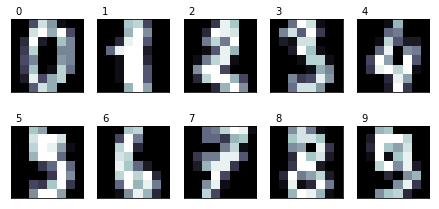

In [14]:
n_row, n_col = 2, 5

def print_digits(images, y, max_n=10):
    # set up the figure size in inches
    #fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    fig = plt.figure(figsize=(1.5*n_col,1.8*n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # label the image with the target value
        p.text(0, -1, str(y[i]))
        i = i + 1
                
    
print_digits(digits.images, digits.target, max_n=10)


A continuación creo la estructura para presentar los resultados de la bondad del método k-means. También se presentan los datos para dos valores del parámetro "init", del método de k-means

In [15]:
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_') #Con esto se crea una línea
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
#Con esto crea la cabecera de la tabla

def bench_k_means(estimator, name, data): #Un función para generar los resultados
    t0 = time()
    estimator.fit(data)
    #"estimator.labels" va a ser el cluster al que se asigna cada uno de los puntos del data
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.29s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.24s	69694	0.669	0.710	0.689	0.553	0.666	0.147


A continuación se muestran la etiquetas que genera este procedimiento K-Means

In [16]:
esti=KMeans(init='k-means++', n_clusters=n_digits, n_init=10).fit(data)
esti.labels_[0:50]

array([1, 3, 2, 9, 4, 9, 0, 8, 9, 9, 1, 2, 6, 9, 4, 7, 0, 8, 3, 9, 1, 2,
       3, 9, 2, 3, 0, 2, 3, 9, 1, 9, 7, 7, 0, 7, 1, 9, 3, 9, 3, 4, 2, 8,
       8, 9, 3, 2, 1, 1])

A continuación vamos a ejecutar un análisis de componentes principales.  Podemos observar que el tiempo empleado se reduce muy sustancialmente, simplemente observando la columna "time". La razón de esto último es debido a que al parámetro "init" le pasamos un array (los ejes factoriales obtenidos en PCA) de dimensión n_clusters * n_features.Gracias a esto podemos poner el parámetro n_init=1 y así no hay que repetir el procedimiento para ajustar los centroides, estos centroides nos lo da el valor del parámetro "init".

In [17]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data) 
#Con pca.components_ calculamos las puntuaciones factoriales sobre los 10 primeros factores
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.27s	69490	0.609	0.656	0.631	0.476	0.605	0.144
random   	0.23s	69425	0.602	0.651	0.626	0.466	0.598	0.138
PCA-based	0.03s	70803	0.670	0.697	0.683	0.561	0.667	0.137
__________________________________________________________________________________


Veamos el tamaño de los componentes del PCA. Observar que es igual a n_clusters * n_features

In [18]:
a=pca.components_
print(a.shape)

(10, 64)


A continuación realizamos un PCA y nos quedamos con los dos primeros componentes. Sobre esos dos ejes factoriales se obtienen las puntuaciones de todas las observaciones

In [19]:
reduced_data = PCA(n_components=2).fit_transform(data)
print(reduced_data.shape)

(1797, 2)


#Sobre los datos anteriores hacemos un kmeans

In [20]:
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

procedemos a la representación de los datos. A continuación se hacen los preparativos

In [21]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# de esta manera obtenemos la predicción para cada uno de los puntos de la malla

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#Con esto tenemos la predicción en cada uno de los puntos de la malla

In [22]:
print(xx.shape)
print(yy.shape)
print(xx.ravel().shape)
print(yy.ravel().shape)
print(np.c_[xx.ravel(), yy.ravel()].shape)

(927, 949)
(927, 949)
(879723,)
(879723,)
(879723, 2)


En el código anterior se han utilizado las propiedades "ravel" y "np.c_" de numpy, vemos loa que significa.

Empecemos por ** ravel ** . Lo que hace es poner todos los elemento de una matriz en una sola fila (por eso xx.ravel tiene dimensión 879723=927*949). Veamos un ejemplo.

In [23]:
a=np.array([[1,2],[3,4]])
print("a= ",a)
print("a.ravel= ",a.ravel())

a=  [[1 2]
 [3 4]]
a.ravel=  [1 2 3 4]


Veamos con un ejemplo lo que hace np.c_. El ejemplo es lo suficientemente ilustrativo como para no necesitar mayor explicación 

In [24]:
a=np.array([1,2,3])
print("a= ",a)
b=np.array([4,5,6])
print("b= ",b)
c=np.c_[a,b]
print("c= ",c)

a=  [1 2 3]
b=  [4 5 6]
c=  [[1 4]
 [2 5]
 [3 6]]


Ahora ya comenzamos a hacer las figuras. Primero ponemos la base de las mismas

In [25]:
plt.figure(1)
#Con lo anterior definimos el contendor de las fiiguras
plt.clf()
#Con esto aclaramos la figuira, si es que contiene algo.

<Figure size 432x288 with 0 Axes>

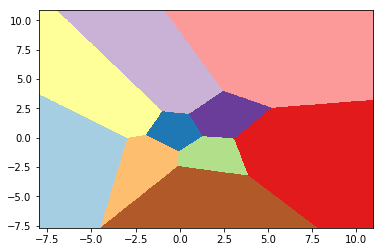

In [26]:
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

El método "imshow" de matplotib se puede ver en el siguiente enlace https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html. Aquí se utiliza para definir las areas de los 10 clúster's

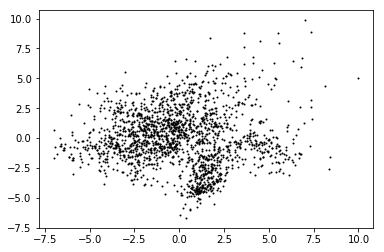

In [27]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
#Aquí sacaríamos los puntos sobre los que se ha hecho el kmeans

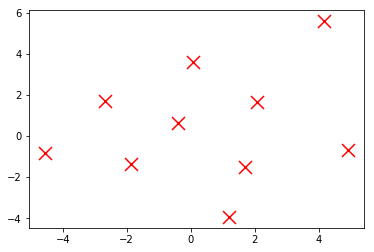

In [28]:
# Aquí sacariamos los centroides. Aquí de de rojo, pero en el gráfico final irán 
#en blanco para tener el contraste necesario.
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

Juntando todo lo anterior, el gráfico final sería el siguiente:

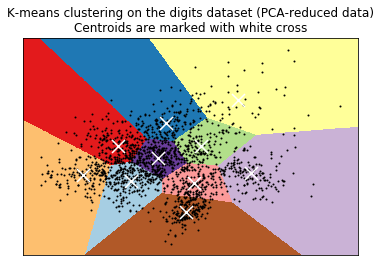

In [29]:
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Cluster Jerárquico

En este apartado, procedo a presentar otro de tipo de agrupación de los datos mediante un sistema jerárquico de agrupación de los datos. Esta representación jerárquica se realiza mediante los **denominados dendogramas** que no son más que representaciones de cómo se van agrupando los datos. Otra característica de estos sistema, es que no se necesita con carácter previo determinar el número k de clústers a utilizar. 

Para realizar este tipo de agrupaciones, se seguirán los pasos siguientes:

1.- Calcular la matriz de distancia entre todas las muestras.

2.- Comenzar Representando cada punto como un clúster simple.

3.- Agrupar los dos cluster más similares en base a la métrica utilizada.

4.- Actualizar la matriz de distancias

5.- Repetir los pasos del 2 al 4 hasta que quede un solo clúster

Vamos a continuación a ver cómo se implementan estos pasos. Primero vamos a calcular la matriz de distancias de una serie de  números aleatorios que vamos a generar para utilizarlos en el ejemplo.

In [30]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


En el anterior ejemplo, se ha construido un dataframe de pandas donde las filas están identificadas como ID_0...ID_4 y las columnas serían las features que se las denomina X, Y, Z.

Como ya se ha dicho anteriormente para estos procesos, se necesita igualmente una matriz de distancias entre las diversas features con las que se trabaja, en nuestro caso, el resultado final sería una matriz de tamaño 3x3, y para las distancias se utilizará el módulo scipy.spatial.distance de scipy.

In [31]:
from scipy.spatial.distance import pdist, squareform
# squareform crea una matriz simétrica de distancias entre features
distancias = pd.DataFrame(squareform(
    pdist(df, metric='euclidean')),
    columns=labels, index=labels)
distancias

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


Una vez obtenidas las distancias entre las features usaremos el módulo *scipy.cluster.hierarchy* para generar el clúster.

In [32]:
from scipy.cluster.hierarchy import linkage
# Observar que de esta forma tampoco es necesario el cálculo
# de las distancias con carácter previo
clusters = linkage(pdist(df, metric='euclidean'),
    method='complete')

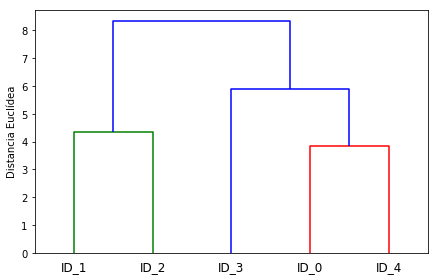

In [33]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(clusters,
    labels=labels,
     # make dendrogram black (part 2/2)
     # color_threshold=np.inf
    )
plt.tight_layout()
plt.ylabel('Distancia Euclídea')
plt.show()

Desde scikip-learn, este cluster también se podría crear de la siguiente manera

In [34]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
    affinity='euclidean',
    linkage='complete')
labels = ac.fit_predict(X)
print('Asignación Cluster : %s' % labels)

Asignación Cluster : [0 1 1 0 0]


# Cluster con DBSCAN

Los dos procedimientos de generación de cluster's vistos anteriormente no cubren todas las necesidades en base a la distribución que presentan los puntos que se están estudiando. En este apartado se presentará otro método para crear otro tipo de clúster, en concreto el método DBSCAN. Para presentar el método se generarán una serie de puntos de la siguiente manera.


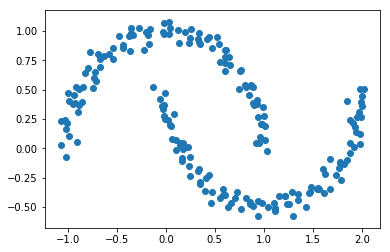

In [35]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
    noise=0.05,
    random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

Observemos los resultados que se obtendrían con los dos métodos anteriores

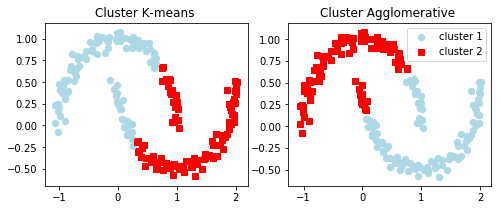

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2,
    random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km==0,0],
    X[y_km==0,1],
    c='lightblue',
    marker='o',
    s=40,
    label='cluster 1')
ax1.scatter(X[y_km==1,0],
    X[y_km==1,1],
    c='red',
    marker='s',
    s=40,
    label='cluster 2')
ax1.set_title('Cluster K-means ')
ac = AgglomerativeClustering(n_clusters=2,
    affinity='euclidean',
    linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
    X[y_ac==0,1],
    c='lightblue',
    marker='o',
    s=40,
    label='cluster 1')
ax2.scatter(X[y_ac==1,0],
    X[y_ac==1,1],
    c='red',
    marker='s',
    s=40,
    label='cluster 2')
ax2.set_title('Cluster Agglomerative ')
plt.legend()
plt.show()                                 
                                 

Veamos cómo queda con DBSCAN

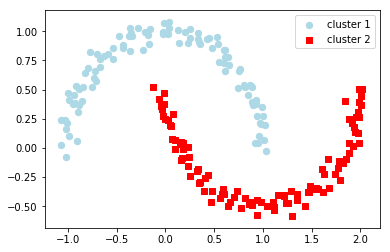

In [37]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
    min_samples=5,
    metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],
    X[y_db==0,1],
    c='lightblue',
    marker='o',
    s=40,
    label='cluster 1')
plt.scatter(X[y_db==1,0],
    X[y_db==1,1],
    c='red',
    marker='s',
    s=40,
    label='cluster 2')
plt.legend()
plt.show()

Como puede verse en este caso el resultado mejora ostensiblemente en relación con los dos primeros métodos de clustering que se han presentado.

Existen muchos más métodos para generar clusters de los datos objeto de estudio, el lector interesado puede ver estos métodos [en este enlace](http://scikit-learn.org/stable/modules/clustering.html#clustering){:target="_blank"}. 